# Introduction to Deep Learning Basic

This module introduces the core ideas of *deep learning*; we will first introduce a very basic neural network and then dive into deep learning with an image classification problem.

In [1]:
# Install the required Python libraries

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install tensorflow
!pip install keras
!pip install seaborn

# 1. Neural Network
## 1.1 Architecture
We start by reviewing the basic neural network architecture, which forms the basis of deep learning. The diagram below shows the architecture or topology of a simple neural network also called a multilayer perceptron (mlp).

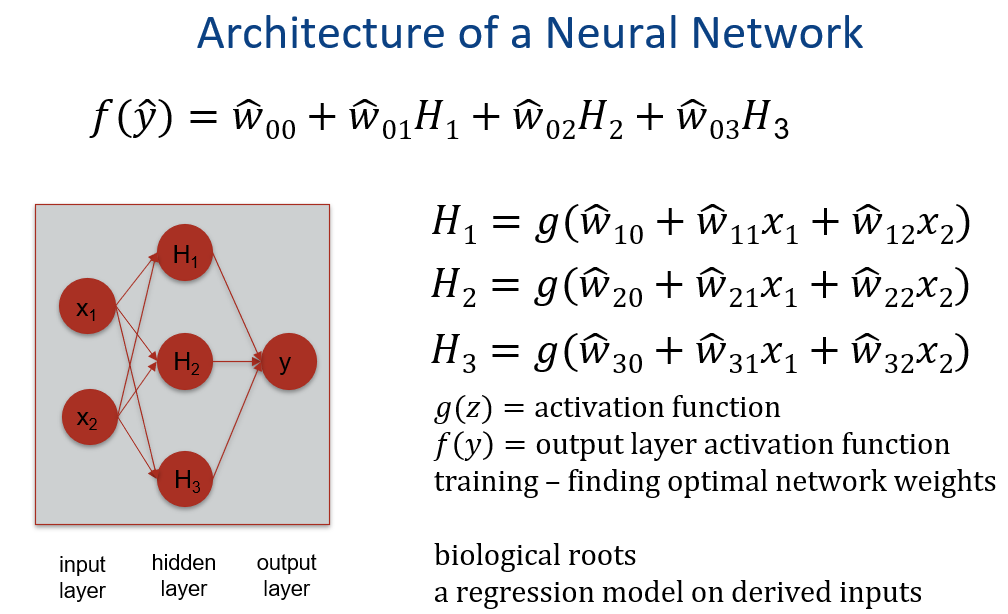

# 2. Deep Learning
## 2.1 MNIST

Now we will demostrate a 'hello world' example of deep learning, which is the MNIST problem. The problem is to classify 28 x 28 pixel greyscale images of handwritten digits into their 10 categories (0-9). 

Diagram by Joseph Steppan, Sample images from MNIST test data set  https://en.wikipedia.org/wiki/MNIST_database.

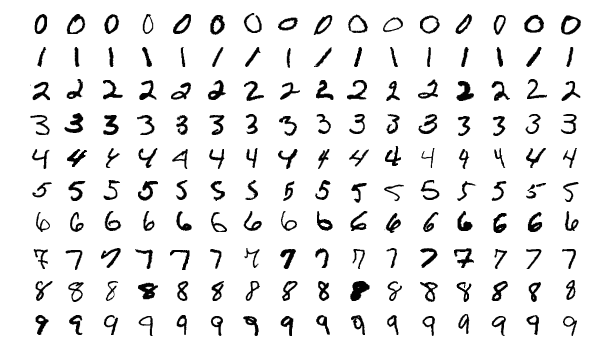

### Import data
Import the MNIST data set from the keras API. The training data set contains 60000 training images, with shape 28 x 28. The data representation in this case would be a 3D numpy array with shape (60000, 28, 28). There is also a test set to test our model, which has 10000 test images.

In [2]:
# Import the Keras module to load read the MNIST data set and print the shape of the arrays

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)

print(len(train_labels))

print(train_labels)

print(test_images.shape)

print(len(test_labels))

print(test_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


The code shows a sample greyscale handwritten image. As you can see it has a dimension of 28 x 28.

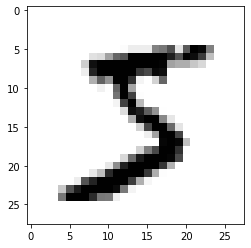

In [3]:
# Use matplotlib's pyplot function to show an image object

digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Text(0, 0.5, 'Count')

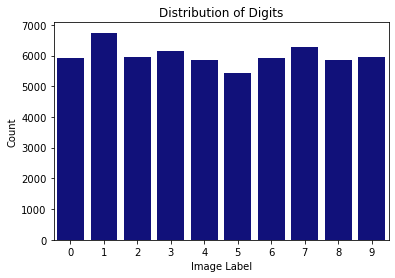

In [4]:
# plot the distribution of digits using seaborn imported as sns

import seaborn as sns

#sns.countplot(x=train_labels, palette="Accent")
sns.countplot(x=train_labels, color="darkblue")
plt.title("Distribution of Digits")
plt.xlabel("Image Label")
plt.ylabel("Count")


In [5]:
# Calculate the frequencies of each digit using the numpy unique function

import numpy as np

np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

### Create the layer
Now we are entering the core part of the neural network, namely *layers*. The *Sequential* here means a linear stack of layers. The *Dense* here means a densely connected (also being referred as fully connected) layer. We set the input array shape to 
be 28 x 28. The ouput for the second layer is 10-way softmax layer; it will return an array of 10 probability scores.

In [6]:
# Construct a very, very simple densely connected neural network to get a baseline model for comparison 
# later with a convolutional neural network

from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


### Network Compilation
In order to make the network ready for training, we need a loss function, an optimizer, and matrices to monitor training and testing.
* The loss function lets the network to measure its performance on the training data.
* The optimizer is the mechanism that the network uses to update itself based on the loss function.
* The metrics are used to evaluate the model.


In [7]:
# Specify the optimizer, the loss function and the evaluation metrics to be used for the constructed neural network

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Data preprocessing
Now, we preprocess the data by reshaping it into the form required by the neural network. Also, we transform the type of the value from uint8 within [0, 225] interval into float32 within [0, 1] interval.

In [8]:
# Reshape the input and transform the values from an integer to a float

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [9]:
# Do dummy coding of the labels in the train and the test data sets

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Network Training
Finally, it's the time to train our network. What the fit function will do is shown by following:
1. It will evaluate (predict) the output based on the input image. (Forward pass)
2. Then, it will compute the loss based on the loss function, which is the measurement of the mismatch between the prediction and the actual result.
3. Finally, the network will update its weights using the optimizer based on the loss function.

Here, We run the above step by five times, or **Epochs** referring to number of training take place. Finally, Then we get an accuracy of 98.9 %.

In [10]:
# Train our neural network for 5 epochs using a batch size of 128 on the train data set 

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2591 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0691 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0500 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0372 - accuracy: 0.9887


The test accuracy is about 97.7 %, which is quite different from the training accuracy. This is an example of overfitting.

In [11]:
# Compute the accuracy on the test data set

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9800
test_acc: 0.9800000190734863


## 2.1 Deep Learning for Computer Vision

When we talk about computer vision, the convnets (or referred as convolutional neural network) will always come to mind since it has been so successful in this field. In the previous section, the accuracy is 97.9 %. Now we are going to improve it by using convnets.

One of the fundamental differences between a densely connected layer (our first method) and convnets is that dense layer observe the global pattern, while the convents focus on local pattern. In our case, it is a 3 x 3 window.

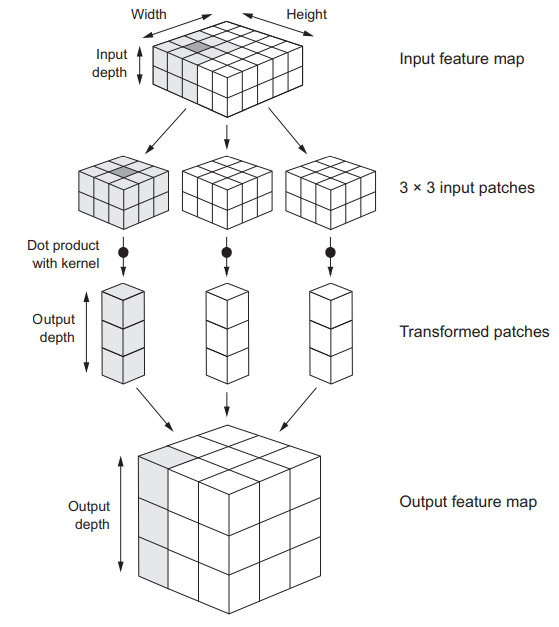

Picture from Deep Learning With Python by FRANÇOIS CHOLLET ©2018 by Manning Publications Co.

### Before Convolution Operation
Essentially, the convnet takes the input tensors of shape (image_height, image_width, image_channels). In this case, our image_channels will be one, since the images we have are monochrome. Hence, the (28, 28, 1) is passed to our first layer.
### During the Convolution Operation
There are two key parameters:
* Size of the patches extracted from the inputs: in this case, it is 3 x 3, which is commonly used. It can also be 5 x 5.
* Depth of the output feature map: the number of filters generated by the computation. We typically choose 32 or 64. **Filter** encode a certain aspect of the input data.

In keras, the parameter is passed in the following form: 
> Conv2D(output_depth, (window_height, window_width))

* Step 1: the (window_height x window_width) shaped window will stop at every possible location on the input. 
* Step 2: Several (window_height x window_width) input patches will be formed. 
* Step 3: Each of the patches will then be transformed into a 1D vector of shape (output_depth,) by doing the dot product with the kernel. 
* Step 4: These 1D vectors will be spatially assembled into a 3D output of shape (height, width, output_depth). 

See the above diagram for a more intuitive understanding.

In [12]:
# Construct a simple convolutional neural network to solve the MNIST digit classification problem

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________
None


The output shape of the convnet layer is (26, 26, 32), where 32 is the output_depth defined by our parameter; there are 26 x 26 transformed patches formed in step 3.

This an example of border effects. There are other things such as padding and strides which will influence the output size.

### Border Effects

We notice that the size of the output shape keeps shrinking as the layers goes deeper. The following diagrams shows the valid locations of 3 x 3 patches on a 5 x 5 input feature map. There are nine locations, which means the output will become (3, 3, output_depth).

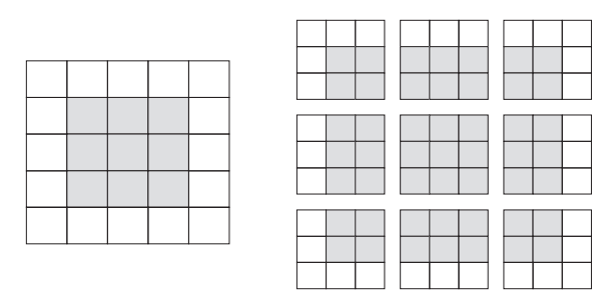

Picture from Deep Learning With Python by FRANÇOIS CHOLLET ©2018 by Manning Publications Co.

### Padding
One way to stop shrinking is padding. Padding is to add an appropriate number of rows and columns to each side of the input feature map in order to fit the patch window around every input tile. 

The following diagram shows a simple padding example.

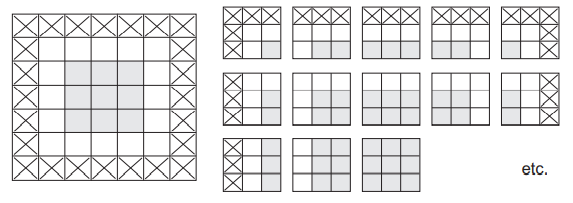

Picture from Deep Learning With Python by FRANÇOIS CHOLLET ©2018 by Manning Publications Co.

After padding, there will be 5 x 5 valid locations of 3 x 3 patches on 5 x 5 input. The output will be (output_depth, 5, 5) after these patches are transformed into 1D vectors, hence it is not shrinking in this case.

### Strides
Strides is another way to affect the size of the output.

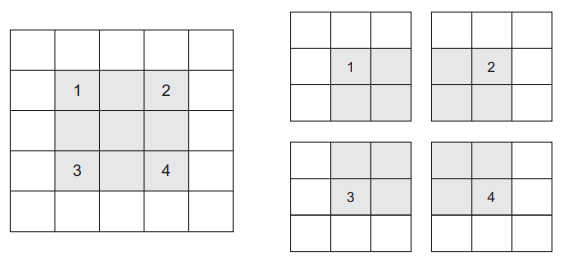

Picture from Deep Learning With Python by FRANÇOIS CHOLLET ©2018 by Manning Publications Co.

Strides refer to the distance between two successive windows. This diagram shows an example of valid locations of 3 x 3 patches with 2 strides from 5 x 5 featured map. Use 2 means downsampling the width and height of the output feature map by factor 2.

Strides is rarely used in real world cases, we typically use max pooling to downsampling the output feature map.

### Max Pooling Operation
The max pooling operation is used for downsampling by outputting the max value of each channel. Generally, it will use 2 x 2 patches with 2 strides and transformed via hardcoded max tensor operations instead using kernel as in step 3.

We notice from the model summary that the it halves the output feature map. This is similar to the effect of the strides.

Now we will create the dense layered network same as above.

In [13]:
# To complete the convolutional neural network, we add a small number of fully connected layers, but we have
# to flatten the tensor we currently have to make this work

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

Now we only need to copy the same code of data preprocessing and training from the previous basic example.

From the result, we know that the accuracy is 99.4%

In [14]:
# Add preprocessing code to stitch all the code together

#from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 14s 14ms/step - loss: 0.1739 - accuracy: 0.9455
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0469 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0323 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0256 - accuracy: 0.9919
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0193 - accuracy: 0.9939


The test accuracy is 99.1%, which is quite a increase from the basic dense neural network.

In [15]:
# Compute the accuracy on the test data set

test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.9905


Now, you might have felt the power of convolutional neural network and understand why it has been so successful in the realm of image processing. 